In [1]:
pip install opencv-python pip install face-recognition 

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement install (from versions: none)
ERROR: No matching distribution found for install


Face recognition process completed.


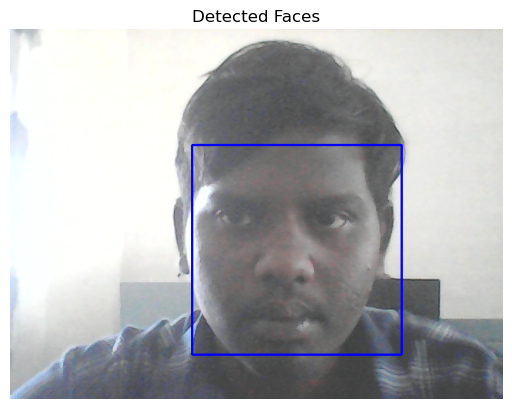

In [3]:

import cv2
import matplotlib.pyplot as plt

# Initialize the face classifier
face_classifier = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

# Start video capture
cap = cv2.VideoCapture(0)
last_frame = None  # Variable to store the last frame

while cap.isOpened():
    # Capture frame-by-frame
    ret, frame = cap.read()
    if not ret:
        break
    
    # Convert to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    # Detect faces
    faces = face_classifier.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(60, 60))

    # Draw rectangles around faces
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)

    # Store the frame to display it later
    last_frame = frame

    # Display the resulting frame
    cv2.imshow('Face Recognition', frame)

    # Exit on pressing 'q' or if the window is closed
    if cv2.waitKey(1) & 0xFF == ord('q') or cv2.getWindowProperty('Face Recognition', cv2.WND_PROP_VISIBLE) < 1:
        break

# Release the capture and close windows
cap.release()
cv2.destroyAllWindows()

# Print message after recognition window is closed
print("Face recognition process completed.")

# Display the last frame with detected faces using matplotlib
if last_frame is not None:
    # Convert from BGR to RGB for matplotlib display
    last_frame_rgb = cv2.cvtColor(last_frame, cv2.COLOR_BGR2RGB)
    plt.imshow(last_frame_rgb)
    plt.title("Detected Faces")
    plt.axis('off')  # Hide axis
    plt.show()
else:
    print("No frame was captured.")
